# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
df = pd.read_csv("lab12_files/US_Baby_Names_right.csv")

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names = df
print(type(baby_names))
print(len(baby_names))

<class 'pandas.core.frame.DataFrame'>
1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
print(baby_names[:10])

   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [5]:
baby_names.drop(columns=["Unnamed: 0", "Id"])

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [6]:

if baby_names[baby_names.Gender=="M"].count()["Gender"] > baby_names[baby_names.Gender=="F"].count()["Gender"]:
    print("More males")
else:
    print("More females")

More females


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [7]:
print(baby_names['Name'].value_counts()[:10])

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: Name, dtype: int64


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

<BarContainer object of 10 artists>

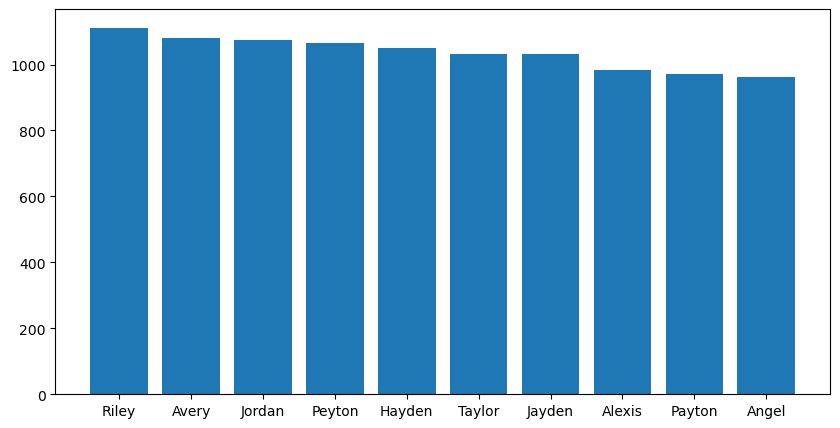

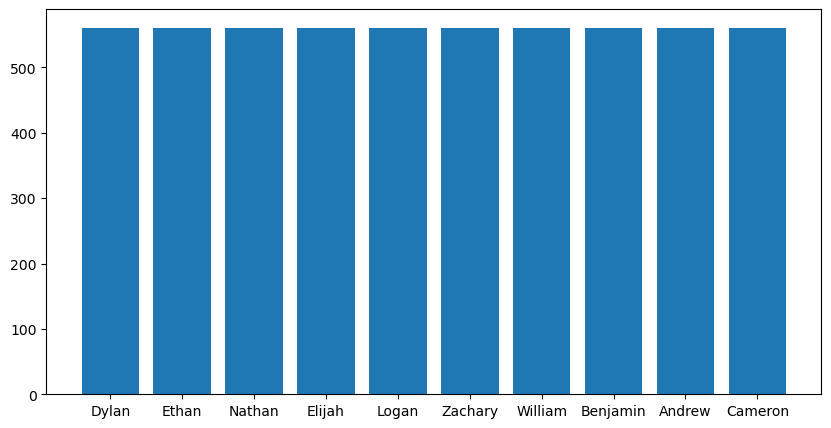

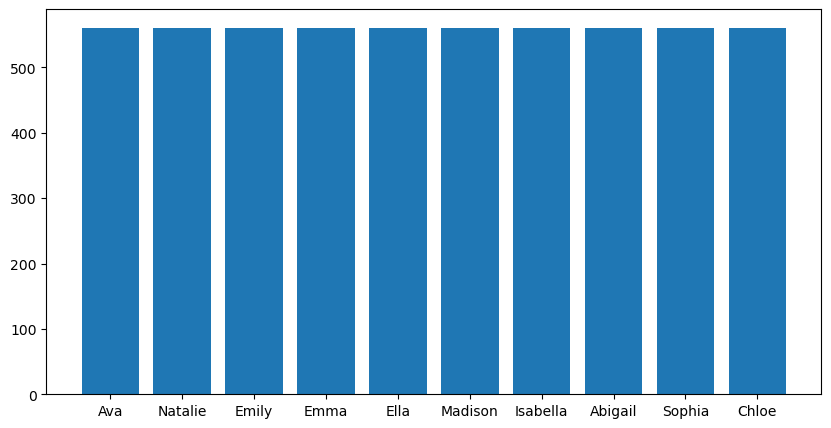

In [8]:
import matplotlib.pyplot as plt
names = baby_names.groupby('Name')['Name'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(names.index, names.values)

names = baby_names[baby_names["Gender"]=='M'].groupby('Name')['Name'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(names.index, names.values)

names = baby_names[baby_names["Gender"]=='F'].groupby('Name')['Name'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(names.index, names.values)

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [9]:
unique = len(baby_names['Name'].unique());
print(unique)

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [10]:
def generator():
  probs = baby_names['Name'].value_counts()
  return probs.sample(weights = probs)

for i in range(10):
  print(generator())

Malakai    296
Name: Name, dtype: int64
Jolee    71
Name: Name, dtype: int64
Amaya    469
Name: Name, dtype: int64
Fernanda    274
Name: Name, dtype: int64
Roxanne    137
Name: Name, dtype: int64
Mallory    451
Name: Name, dtype: int64
Josephine    514
Name: Name, dtype: int64
Madeline    553
Name: Name, dtype: int64
Bruce    368
Name: Name, dtype: int64
Luisa    118
Name: Name, dtype: int64


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [11]:
names = baby_names['Name'].value_counts()
print(names.idxmax())
print(names.describe())

Riley
count    17632.000000
mean        57.644907
std        122.029964
min          1.000000
25%          2.000000
50%          8.000000
75%         39.000000
max       1112.000000
Name: Name, dtype: float64


## Część II

Krok 1: Wczytaj dane

In [12]:
import pandas as pd

data = pd.read_csv('./lab12_files/ocupation.csv', sep = '|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [13]:
data.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [14]:
data.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


Krok 5: Wypisz nazwy kolumn

In [16]:
data.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

Krok 6: Ile różnych zawodów jest w zbiorze?

In [17]:
data['occupation'].nunique()

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

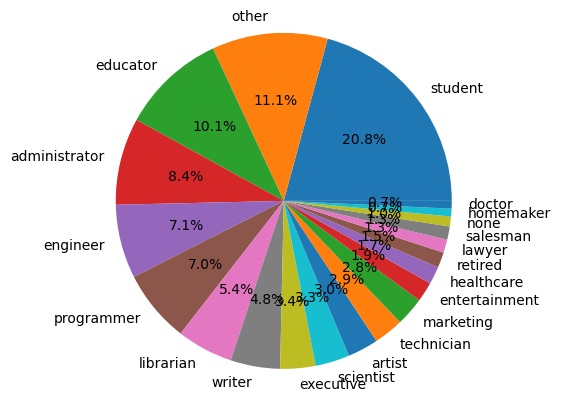

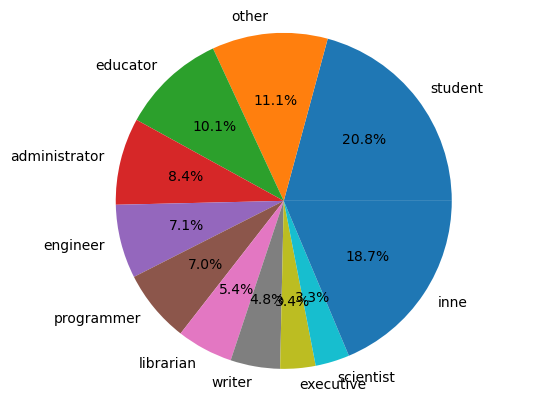

In [18]:
labels = data['occupation'].value_counts().keys()
sizes = data['occupation'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

labels10 = data['occupation'].value_counts().nlargest(10).keys().to_list()
sizes10 = data['occupation'].value_counts().nlargest(10).to_list()
labels10.append('inne')
sizes10.append(sum(sizes)-sum(sizes10))
fig1, ax1 = plt.subplots()
ax1.pie(sizes10, labels=labels10, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

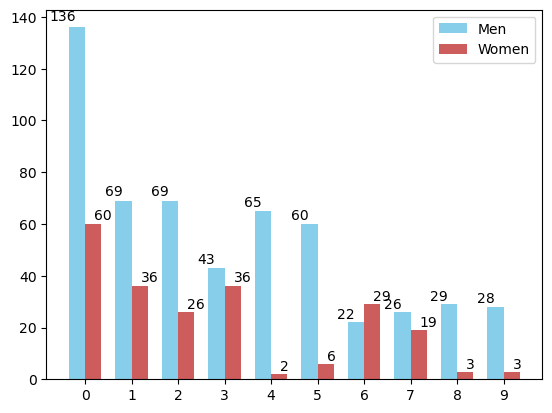

In [19]:
import numpy as np

occupations = data['occupation'].value_counts().nlargest(10).keys().to_list()
mens, womens = [], []

for occupation_ in occupations:
    womens.append(data.groupby("occupation").get_group(occupation_).groupby("gender").size()[0])
    mens.append(data.groupby("occupation").get_group(occupation_).groupby("gender").size()[1])

ind = np.arange(len(mens))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, mens, width,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, womens, width,
                color='IndianRed', label='Women')

ax.set_xticks(ind)
ax.legend()


def autolabel(rects, xpos='center'):

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

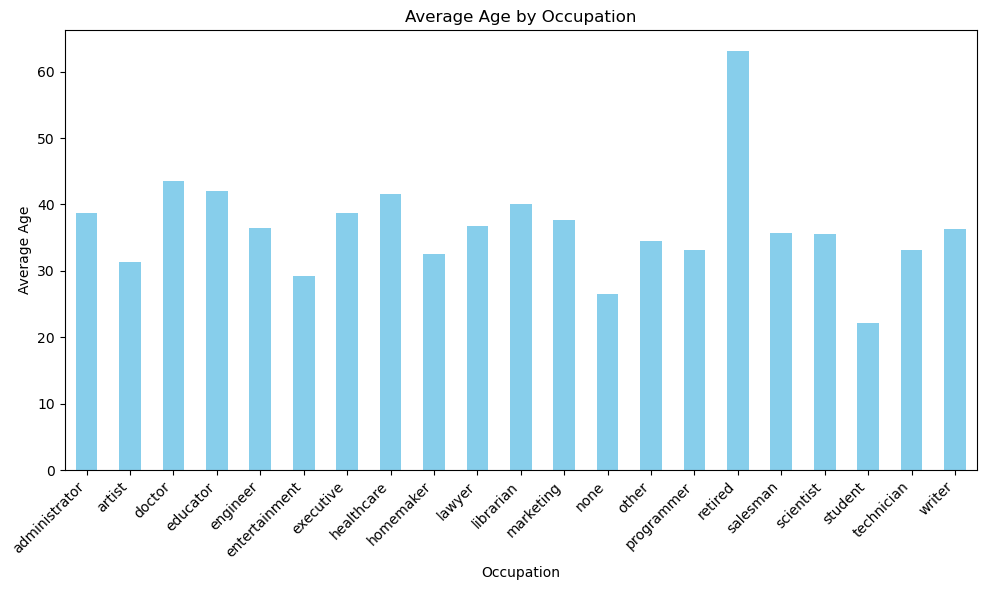

In [20]:
grouped_df = data.groupby("occupation")["age"].mean()
# print(grouped_df)
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', color='skyblue')
plt.title('Average Age by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

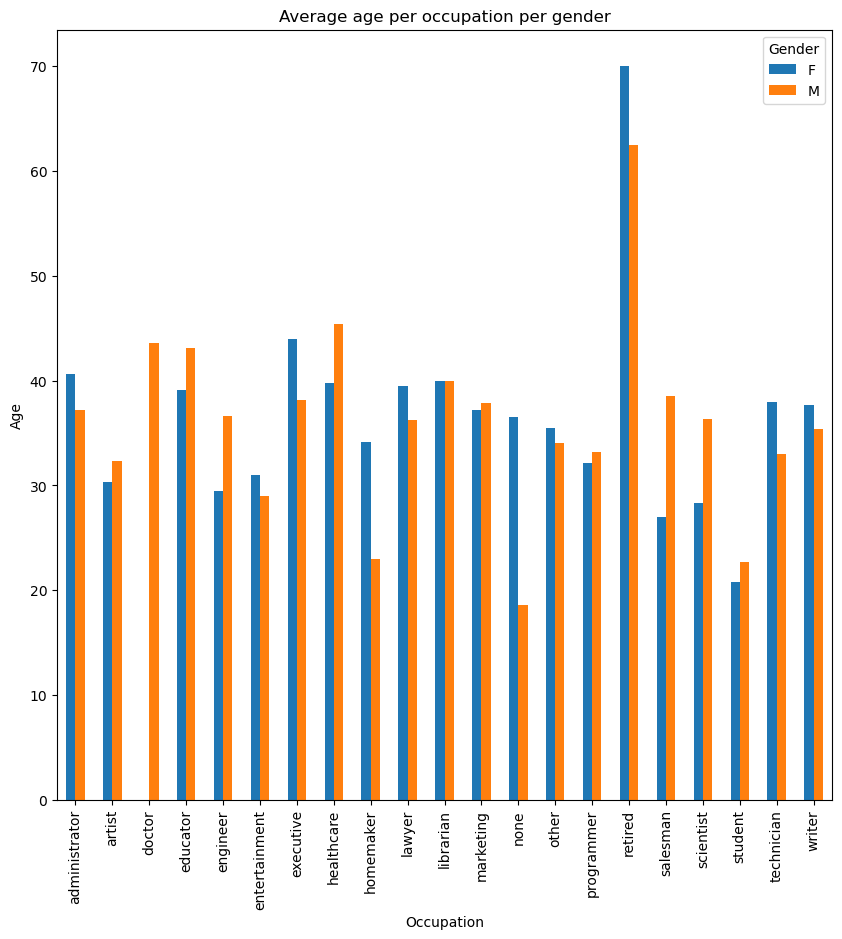

In [21]:
grouped_df = data.groupby(['occupation', 'gender'])['age'].mean().unstack()

grouped_df.plot.bar(figsize=(10, 10))
plt.title('Average age per occupation per gender')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()